# Test responses exploratory data analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv('all_responses.csv')
df.sample(n=10)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q18,q19,q20,q21,q22,q23-0,q23-1,q23-2,q23-3,q23-4
76,8,1,1,NaN,0.0,1.0,0.0,NaN,10.0,0.0,...,0.0,1.0,NaN,9.0,1.0,NaN,"Sim, consigo fazer música com a minha voz ou c...",NaN,NaN,NaN
112,9,0,1,Ce n'était pas un morceau très complexe à jouer,8.0,1.0,1.0,NaN,8.0,1.0,...,0.0,1.0,NaN,8.0,1.0,NaN,"Oui, je peux faire de la musique avec ma voix ...",NaN,NaN,NaN
18,10,0,1,NaN,3.0,1.0,0.0,Muito aleatória,7.0,1.0,...,0.0,1.0,"Tem um toque de elaboração, criatividade.",4.0,2.0,NaN,NaN,NaN,NaN,"Já estudei música por alguns meses, tive músic..."
0,9,0,1,NaN,9.0,0.0,1.0,NaN,10.0,1.0,...,1.0,0.0,NaN,5.0,2.0,Não,NaN,NaN,NaN,NaN
85,10,0,1,NaN,9.0,1.0,1.0,NaN,10.0,0.0,...,0.0,1.0,NaN,6.0,2.0,Não,NaN,NaN,NaN,NaN
21,10,0,1,NaN,10.0,0.0,1.0,NaN,10.0,0.0,...,0.0,1.0,NaN,10.0,1.0,NaN,"Sim, consigo fazer música com a minha voz ou c...",NaN,NaN,NaN
108,8,0,1,NaN,3.0,1.0,0.0,NaN,7.0,0.0,...,0.0,1.0,NaN,8.0,0.0,NaN,"Oui, je peux faire de la musique avec ma voix ...",NaN,NaN,NaN
110,9,0,1,Très réaliste si cela est fait avec du AI,3.0,1.0,0.0,On dirait du pianotage sur des touches mais sa...,8.0,1.0,...,1.0,1.0,On dirait un mélange et pas de direction musical,9.0,2.0,Non,NaN,NaN,NaN,NaN
45,10,0,1,NaN,10.0,0.0,0.0,NaN,10.0,0.0,...,0.0,1.0,NaN,5.0,0.0,NaN,"Sim, consigo fazer música com a minha voz ou c...",NaN,NaN,NaN
64,9,0,1,NaN,6.0,1.0,0.0,NaN,10.0,0.0,...,1.0,1.0,NaN,6.0,0.0,Não,NaN,NaN,NaN,NaN


In [2]:
def extract_labeled_responses(data, label):
    responses = data
    labels = len(responses) * [label]

    df = pd.DataFrame(zip(responses, labels), columns=['response', 'model'])
    return df


model_evaluation_responses_df = pd.concat([
     extract_labeled_responses(df['q1'], 'music-transformers'),
     extract_labeled_responses(df['q5'], 'performance-rnn'),
     extract_labeled_responses(df['q9'], 'muse-net'),
     extract_labeled_responses(df['q13'], 'custom-lstm'),
     extract_labeled_responses(df['q17'], 'maestro (human)')
])

model_evaluation_responses_df.sample(n=10)

,response,model
17,9.0,music-transformers
58,6.0,music-transformers
12,4.0,custom-lstm
29,10.0,performance-rnn
55,2.0,custom-lstm
33,NaN,muse-net
0,7.0,custom-lstm
70,10.0,performance-rnn
7,7.0,music-transformers
107,1.0,custom-lstm


### Box plot regarding sample musicality 

<AxesSubplot: xlabel='response', ylabel='model'>

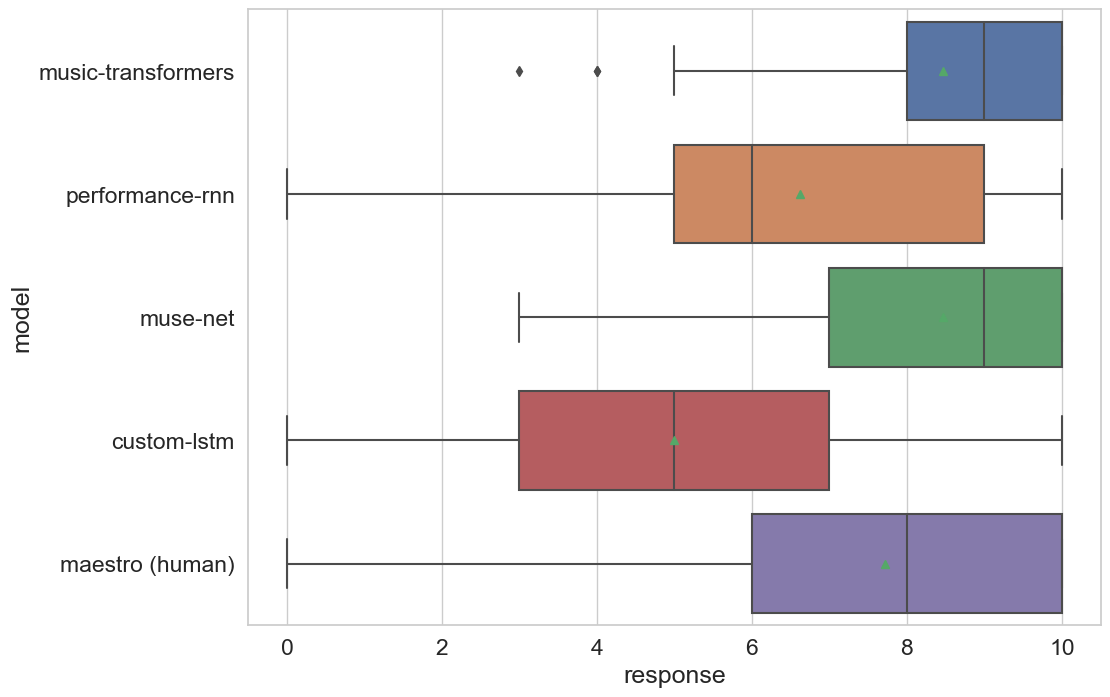

In [3]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(
    x='response',
    y='model',
    data=model_evaluation_responses_df, showmeans=True)

### Shows averege musicality score for each music sample (questions 1, 5, 9, 13, 17)

[Text(0, 0, '4.99'),
 Text(0, 0, '6.62'),
 Text(0, 0, '7.71'),
 Text(0, 0, '8.46'),
 Text(0, 0, '8.46')]

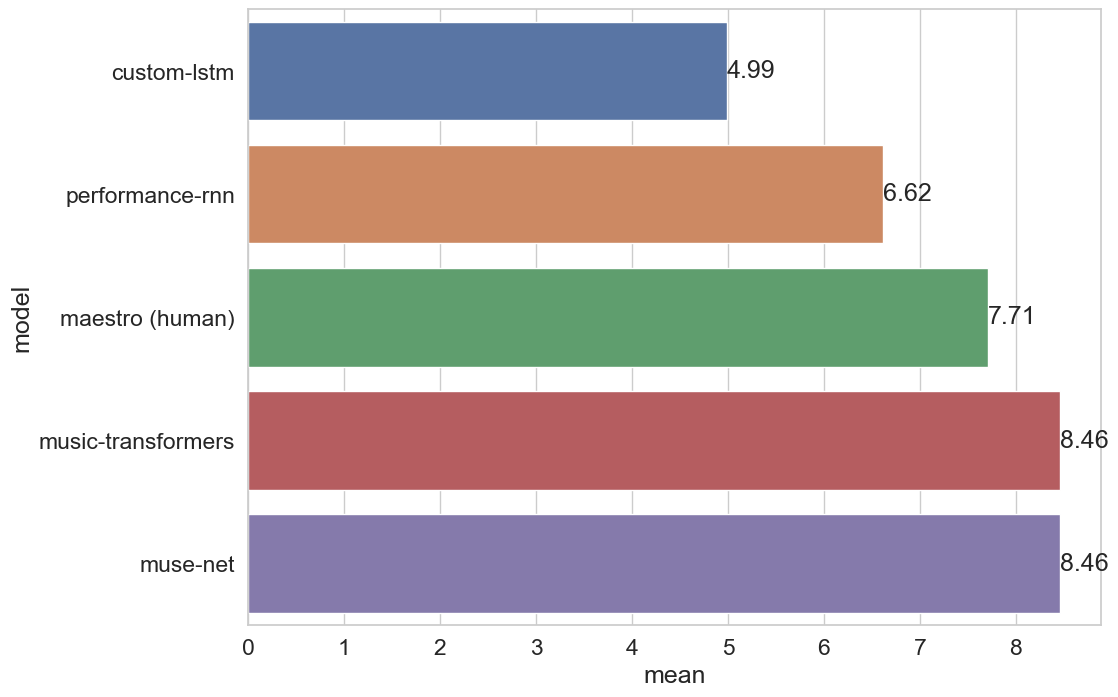

In [4]:
def get_mean(series, model):
    mean = series.mean().round(2)
    # print(f'Model {model} obtained a mean of {mean}')
    return mean, model

q1_mean, q1_model = get_mean(df['q1'], 'music-transformers')
q5_mean, q5_model = get_mean(df['q5'], 'performance-rnn')
q9_mean, q9_model = get_mean(df['q9'], 'muse-net')
q13_mean, q13_model = get_mean(df['q13'], 'custom-lstm')
q17_mean, q17_model = get_mean(df['q17'], 'maestro (human)')

means = [q1_mean, q5_mean, q9_mean, q13_mean, q17_mean]
labels = [q1_model, q5_model, q9_model, q13_model, q17_model]

model_evaluation_means_df = pd.DataFrame(zip(means, labels), columns=['mean', 'model']).sort_values(by='mean')
ax = sns.barplot(x='mean', y='model', data=model_evaluation_means_df)
ax.bar_label(ax.containers[0])
# pd.DataFrame(means, labels)

### Extract and plot hit rate percentage for each musical excerpt regarding its compositional origin

In [5]:
def extract_computer_human_votes_percentage(series, model):
    series = extract_labeled_responses(series, model)

    value_counts_df = series.value_counts(normalize=True)

    human_composer_votes_percentage = round(value_counts_df.at[0][0] * 100, 2)
    machine_composer_votes_percentage = round(value_counts_df.at[1][0] * 100, 2)

    return pd.DataFrame.from_dict({
        'model': model,
        'human_composer_votes_percentage': [human_composer_votes_percentage],
        'machine_composer_votes_percentage': [machine_composer_votes_percentage]
    })

turing_test_results_df = pd.concat([
    extract_computer_human_votes_percentage(df['q2'], 'music-transformers'),
    extract_computer_human_votes_percentage(df['q6'], 'performance-rnn'),
    extract_computer_human_votes_percentage(df['q10'],'muse-net'),
    extract_computer_human_votes_percentage(df['q14'], 'custom-lstm'),
    extract_computer_human_votes_percentage(df['q18'], 'maestro (human)')
])

turing_test_results_df

,model,human_composer_votes_percentage,machine_composer_votes_percentage
0,music-transformers,53.91,46.09
0,performance-rnn,36.36,63.64
0,muse-net,64.42,35.58
0,custom-lstm,17.82,82.18
0,maestro (human),64.36,35.64


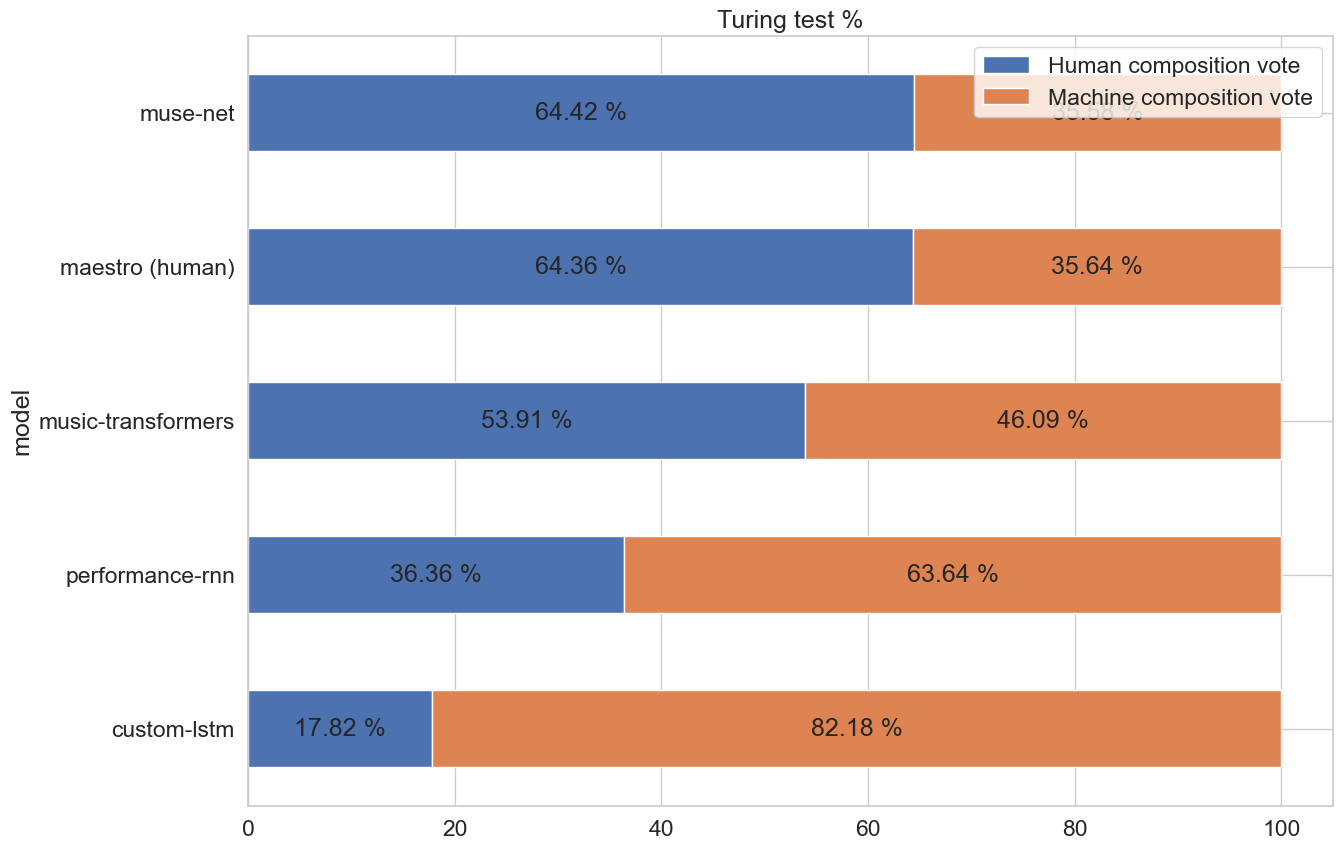

In [6]:
def plot_percentages(df, sort_by, title, legends):
    df = df.set_index('model')
    df = df.sort_values(by=sort_by)

    ax = df.plot(
        kind = 'barh',
        stacked = True,
        title = title,
        figsize = (14, 10))

    for container in ax.containers:
        labels = [f'{round(bar.get_width(), 2)} %'  for bar in container]

        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(container, labels=labels, label_type='center')

    ax.legend(legends)

plot_percentages(turing_test_results_df,
                 sort_by='human_composer_votes_percentage',
                 title='Turing test %',
                 legends=['Human composition vote', 'Machine composition vote'])

### Extract and plot sample acceptance as classical music

In [7]:
def extract_is_classical_music(series, model):
    value_counts_df = series.value_counts(normalize=True)
    is_classical_vote_percentage = round(value_counts_df.at[1] * 100, 2)
    is_not_classical_vote_percentage = round(value_counts_df.at[0] * 100, 2)

    return pd.DataFrame.from_dict({
        'model': [model],
        'is_classical_vote_percentage': [is_classical_vote_percentage],
        'is_not_classical_vote_percentage': [is_not_classical_vote_percentage]
    })

is_classical_results_df = pd.concat([
    extract_is_classical_music(df['q3'], 'music-transformers'),
    extract_is_classical_music(df['q7'], 'performance-rnn'),
    extract_is_classical_music(df['q11'],'muse-net'),
    extract_is_classical_music(df['q15'], 'custom-lstm'),
    extract_is_classical_music(df['q19'], 'maestro (human)')
])

is_classical_results_df

,model,is_classical_vote_percentage,is_not_classical_vote_percentage
0,music-transformers,91.30,8.70
0,performance-rnn,68.18,31.82
0,muse-net,90.38,9.62
0,custom-lstm,43.56,56.44
0,maestro (human),89.11,10.89


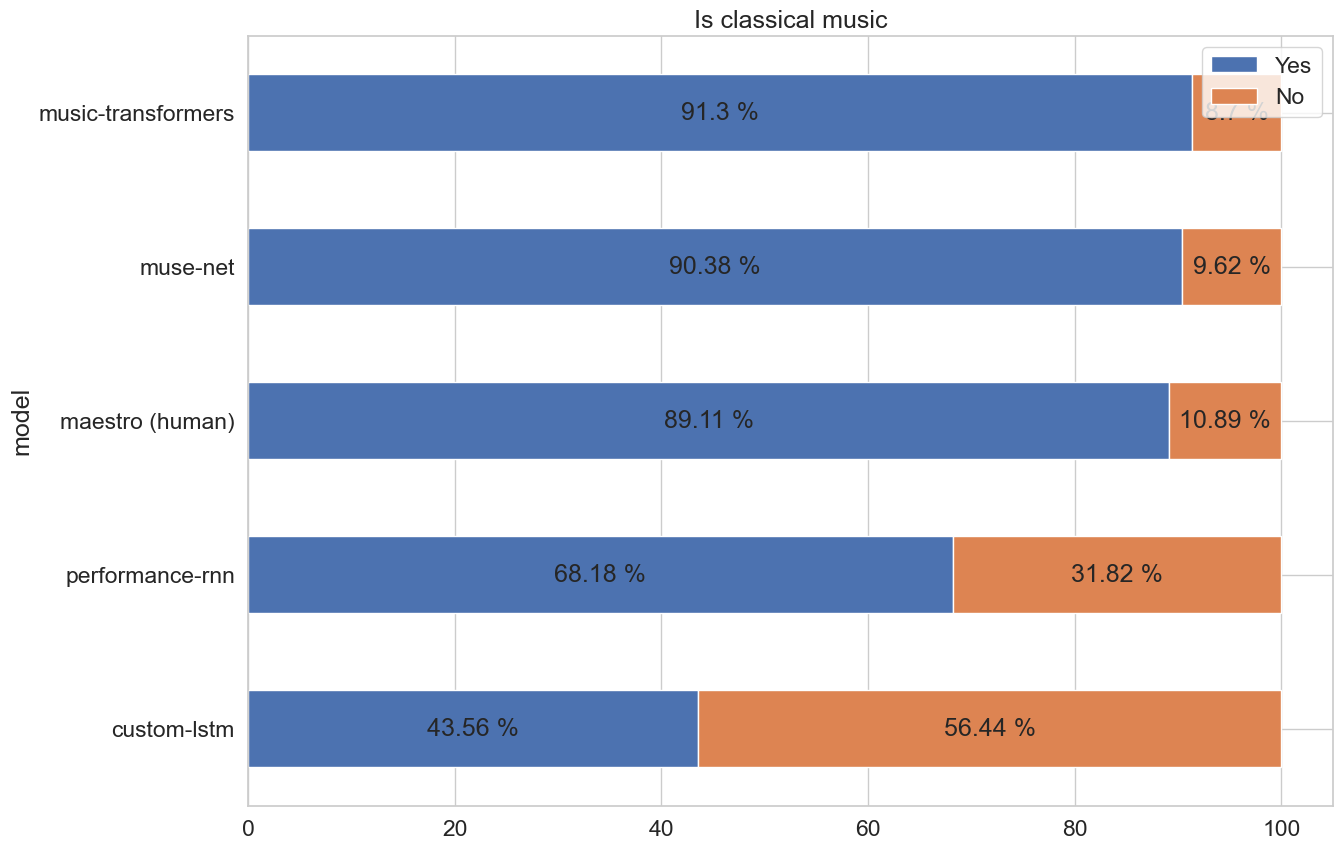

In [8]:
plot_percentages(is_classical_results_df,
                 sort_by='is_classical_vote_percentage',
                 title='Is classical music',
                 legends=['Yes', 'No'])

### Organize and plot data around music sensitivity

[Text(0.5, 1.0, 'Musical sensitivity (avg 6.46)')]

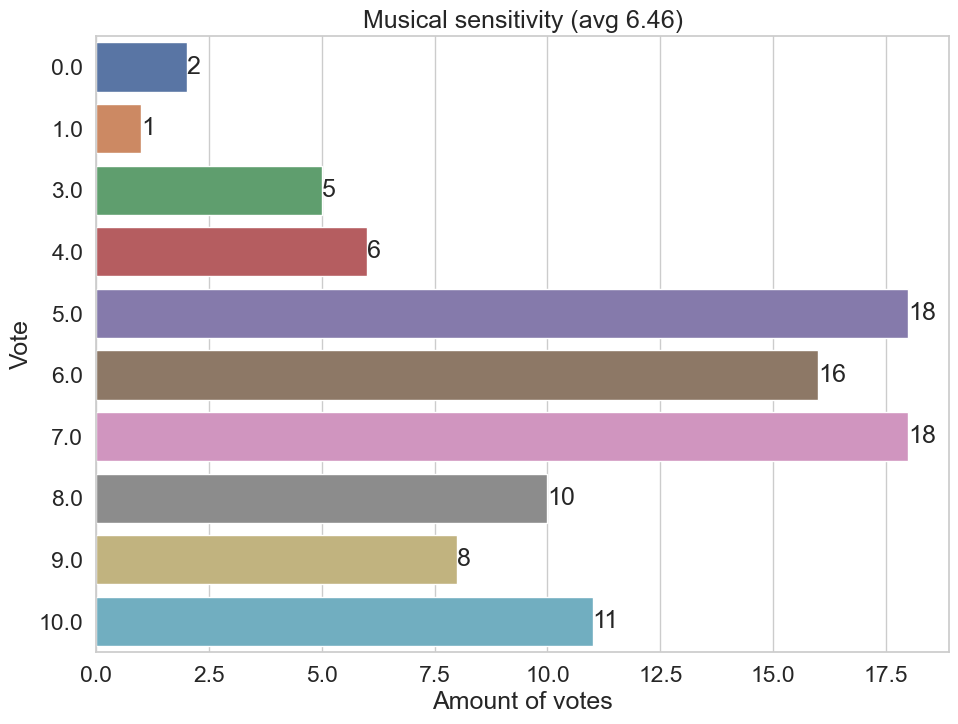

In [9]:
music_sensitivity_vote_counts = df['q21'].value_counts()\
                  .rename_axis('vote')\
                  .reset_index(name='count')\
                  .sort_values(by='vote')

ax = sns.barplot(x='count',
                 y='vote',
                 data=music_sensitivity_vote_counts,
                 orient='h')

musical_sensitivity_avg = round(df['q21'].mean(), 2)

ax.bar_label(ax.containers[0])
ax.set_xlabel('Amount of votes')
ax.set_ylabel('Vote')
ax.set(title=f'Musical sensitivity (avg {musical_sensitivity_avg})')



### Organize and plot data around classical music consumption frequency

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\PedroFerreira\AppData\Local\Temp\ipykernel_3580\3865870138.py:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif value is 1:
C:\Users\PedroFerreira\AppData\Local\Temp\ipykernel_3580\3865870138.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif value is 2:


[Text(0.5, 1.0, 'Classical music hearing frequency ')]

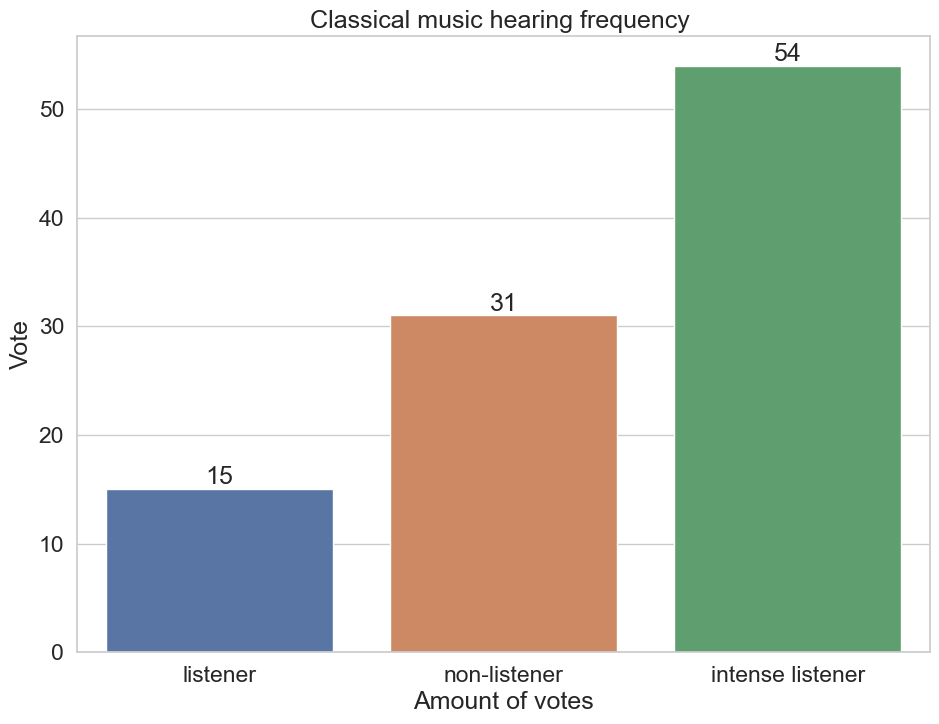

In [10]:
def map_labels(value):
    value = int(value)
    if value == 0:
        return 'non-listener'
    elif value is 1:
        return 'listener'
    elif value is 2:
        return 'intense listener'

    return None

classical_music_frequency_vote_counts = df['q22'].value_counts()\
      .rename_axis('response')\
      .reset_index(name='count')\
      .sort_values(by='count')

classical_music_frequency_vote_counts['label'] = classical_music_frequency_vote_counts['response'].apply(map_labels)

ax = sns.barplot(x='label',
                 y='count',
                 data=classical_music_frequency_vote_counts)

ax.bar_label(ax.containers[0])
ax.set_xlabel('Amount of votes')
ax.set_ylabel('Vote')
ax.set(title=f'Classical music hearing frequency ')

### Visualize hit rate for each sample individually

In [11]:
# extract hit rate from each population

def extract_hit_rate_from_population(series: pd.Series, right_answer: int):
    correct_values = series.value_counts().at[right_answer]    
    hit_rate = round(correct_values / series.count() * 100, 2)

    return hit_rate


def extract_population_stats(population: pd.DataFrame, population_name:str):
    music_transformer_hit_rate = extract_hit_rate_from_population(population['q2'], right_answer=1)
    performance_rnn_hit_rate = extract_hit_rate_from_population(population['q6'], right_answer=1)
    muse_net_hit_rate = extract_hit_rate_from_population(population['q10'], right_answer=1)
    custom_lstm_hit_rate = extract_hit_rate_from_population(population['q14'], right_answer=1)
    human_hit_rate = extract_hit_rate_from_population(population['q18'], right_answer=0)

    population_stats = pd.DataFrame.from_dict({
        'population': [population_name] * 5,
        'model': ['music-transformers', 'performance-rnn', 'muse-net', 'custom-lstm', 'maestro (human)'],
        'hit_rate': [music_transformer_hit_rate, performance_rnn_hit_rate, muse_net_hit_rate, custom_lstm_hit_rate, human_hit_rate]        
     })

    population_stats['error_rate'] = 100 - population_stats['hit_rate']

    return population_stats


def plot_grouped_bar_chart_of_populations(populations):
    ax = sns.barplot(x='hit_rate',
            hue='model',
            y='population',
            data=musical_frequency_populations_results,
            orient='h')

    for container in ax.containers:
        labels = [f'{round(bar.get_width(), 2)} %'  for bar in container]

        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(container, labels=labels, label_type='center')

    # ax.legend(['non-listener', 'listener', 'intense listener'])
    ax.set_xlabel('Hit rate %')
    ax.set_ylabel('Population')
    ax.set(title='Hit rate per population')      


def plot_facet_grid_of_populations(populations_df):
    g = sns.FacetGrid(populations_df, col="model", height=4, aspect=2)
    g.map(sns.barplot, 'hit_rate', 'population', palette="deep", orient='h').add_legend()

    for axes in g.axes:
        for ax in axes:
            for container in ax.containers:
                labels = [f'{round(bar.get_width(), 2)} %'  for bar in container]    
                ax.bar_label(container, labels=labels, label_type='center')


def plot_populations_means(population_df: pd.DataFrame):
    population_means = population_df\
        .groupby('population')\
        .mean()\
        .sort_values(by='hit_rate', ascending=False)\
        .reset_index()



    ax = sns.barplot(x='hit_rate',            
                y='population',
                data=population_means,
                orient='h')

    for container in ax.containers:
        labels = [f'{round(bar.get_width(), 2)} %'  for bar in container]

        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(container, labels=labels, label_type='center')                        

c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PedroFerrei

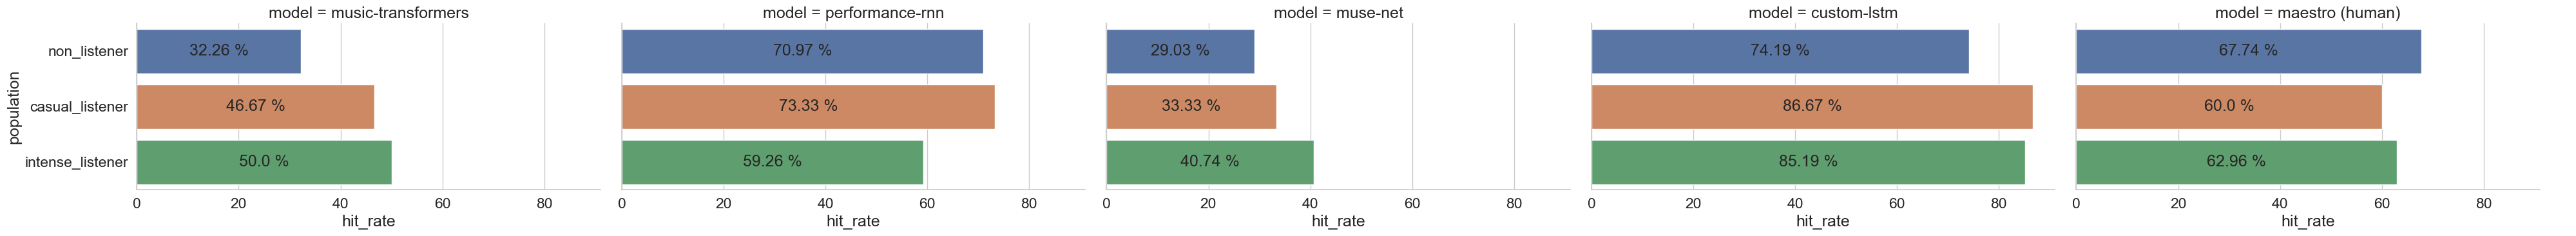

In [12]:
non_listener_population = df.loc[df['q22'] == 0]
listener_population = df.loc[df['q22'] == 1]
intense_listener_population = df.loc[df['q22'] == 2]

musical_frequency_populations_results = pd.concat([
    extract_population_stats(non_listener_population, 'non_listener'),
    extract_population_stats(listener_population, 'casual_listener'),
    extract_population_stats(intense_listener_population, 'intense_listener')
])

# plot_grouped_bar_chart_of_populations(musical_frequency_populations_results)
plot_facet_grid_of_populations(musical_frequency_populations_results)    



### Plot hit rate by classical music consumption frequency

C:\Users\PedroFerreira\AppData\Local\Temp\ipykernel_3580\3885136232.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  population_means = population_df\


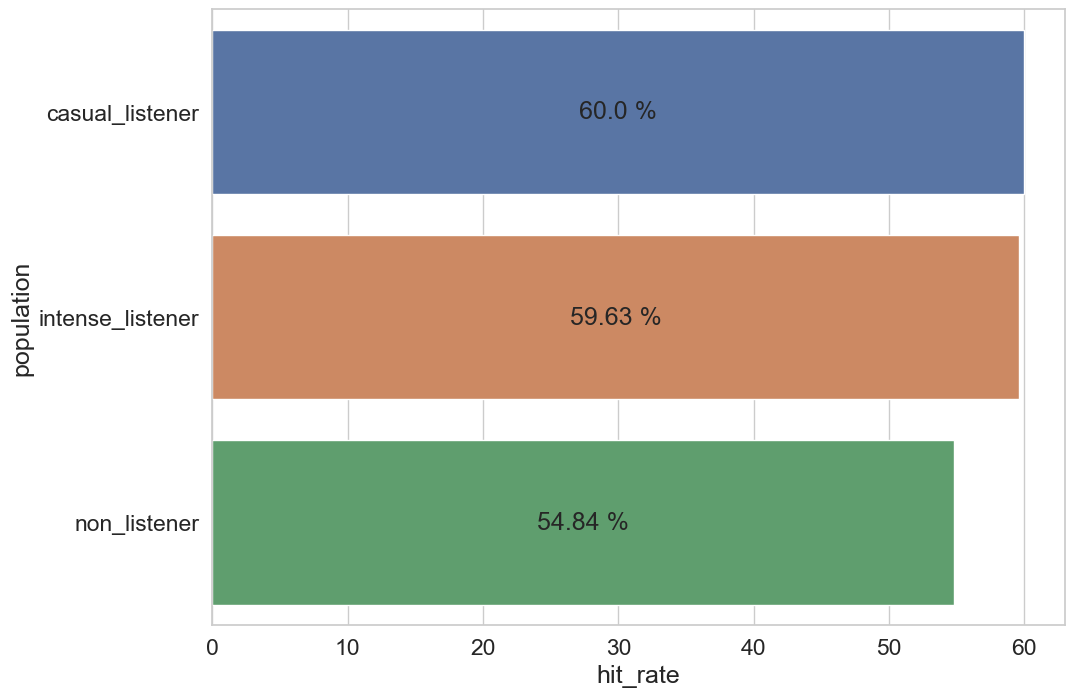

In [13]:
plot_populations_means(musical_frequency_populations_results)

### Visualize hit rate of population grouped by musical experience by model, individually

c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PedroFerrei

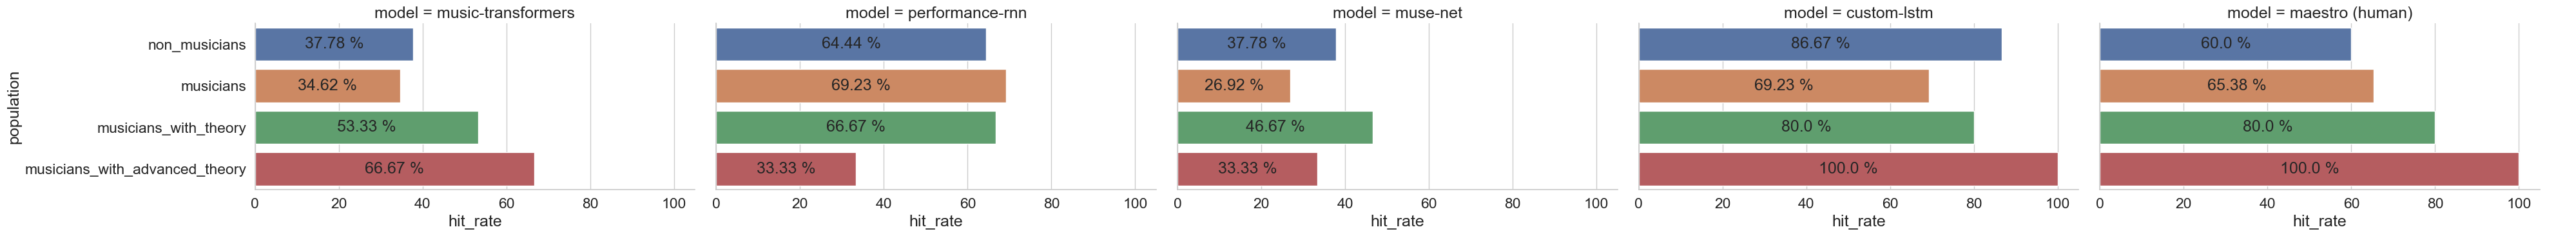

In [14]:
musician_populations_df = df.rename(columns={
        'q23-0':'non_musicians', 
        'q23-1':'musicians', 
        'q23-2':'musicians_with_theory',
        'q23-3':'musicians_with_advanced_theory'    
    }).fillna(0)

non_musicians_population = musician_populations_df.query(
    'non_musicians != 0 & musicians == 0 & musicians_with_theory == 0 & musicians_with_advanced_theory == 0'
)

musicians_population = musician_populations_df.query(
 'non_musicians == 0 & musicians != 0 & musicians_with_theory == 0 & musicians_with_advanced_theory == 0'
)

musicians_with_theory_population = musician_populations_df.query(
'non_musicians == 0 & musicians == 0 & musicians_with_theory != 0 & musicians_with_advanced_theory == 0'
)

musicians_with_advanced_theory_population = musician_populations_df.query(
 'musicians_with_advanced_theory != 0'
)

musicians_populations_results = pd.concat([
    extract_population_stats(non_musicians_population, 'non_musicians'),
    extract_population_stats(musicians_population, 'musicians'),
    extract_population_stats(musicians_with_theory_population, 'musicians_with_theory'),
    extract_population_stats(musicians_with_advanced_theory_population, 'musicians_with_advanced_theory')
])

plot_facet_grid_of_populations(musicians_populations_results)


### Plot hit rate average by musical experience

C:\Users\PedroFerreira\AppData\Local\Temp\ipykernel_3580\3885136232.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  population_means = population_df\


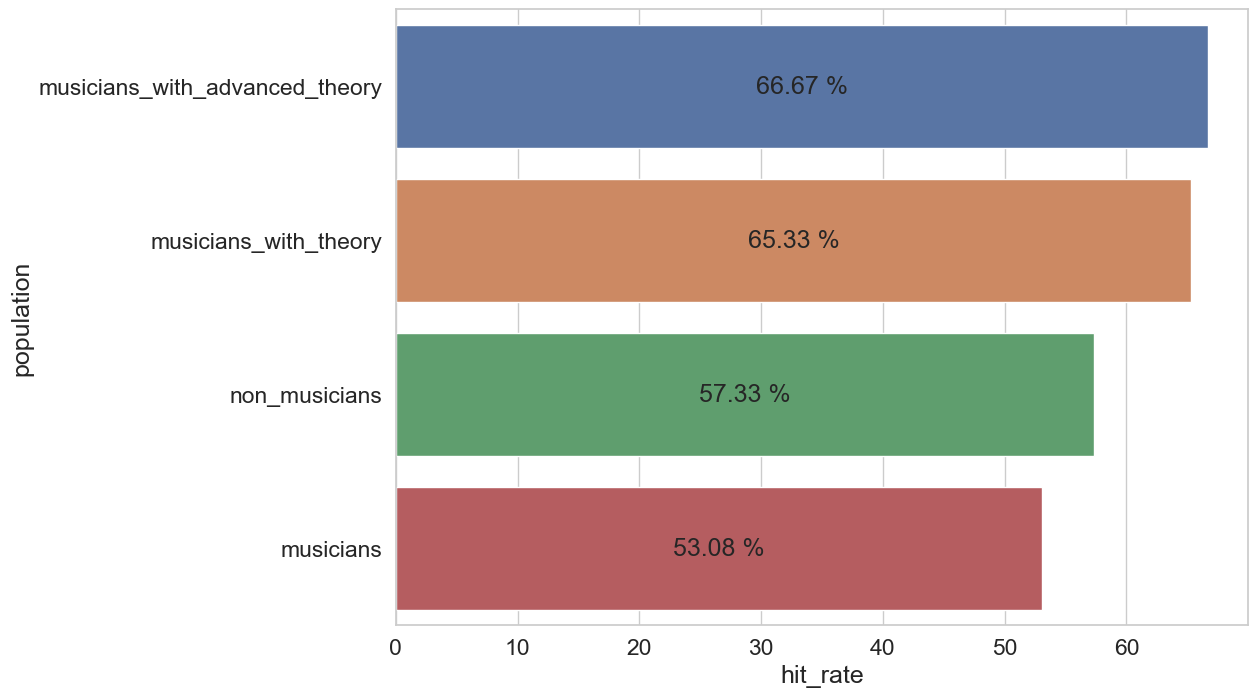

In [15]:
plot_populations_means(musicians_populations_results)

In [16]:
musical_sensitivity_population_df = df.rename(columns={
        'q21':'musical_sensitivity'
    }).fillna(0)

high_sensitivity_population = musical_sensitivity_population_df.query('musical_sensitivity > 7')
regular_sensitivity_population = musical_sensitivity_population_df.query('musical_sensitivity > 3 & musical_sensitivity <= 7')
low_sensitivity_population = musical_sensitivity_population_df.query('musical_sensitivity <= 3')

### Plot hit rate by musical sensitivity individually

c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PedroFerreira\anaconda3\envs\presentation-env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PedroFerrei

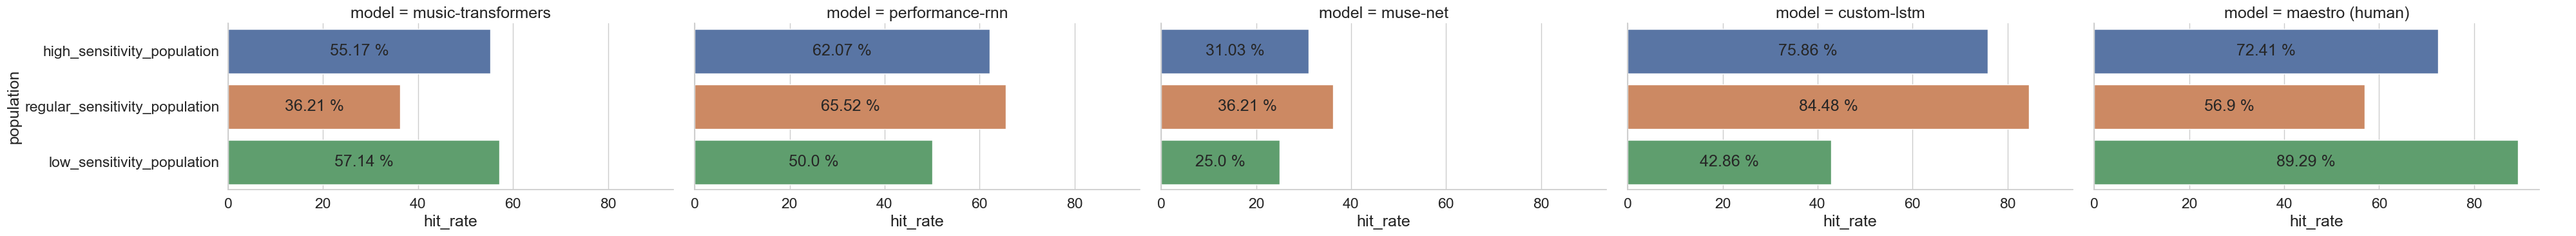

In [17]:
music_sensitivity_population_results = pd.concat([
    extract_population_stats(high_sensitivity_population, 'high_sensitivity_population'),
    extract_population_stats(regular_sensitivity_population, 'regular_sensitivity_population'),
    extract_population_stats(low_sensitivity_population, 'low_sensitivity_population')
])


plot_facet_grid_of_populations(music_sensitivity_population_results)

### Plot hit rate average by musical sensitivity

C:\Users\PedroFerreira\AppData\Local\Temp\ipykernel_3580\3885136232.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  population_means = population_df\


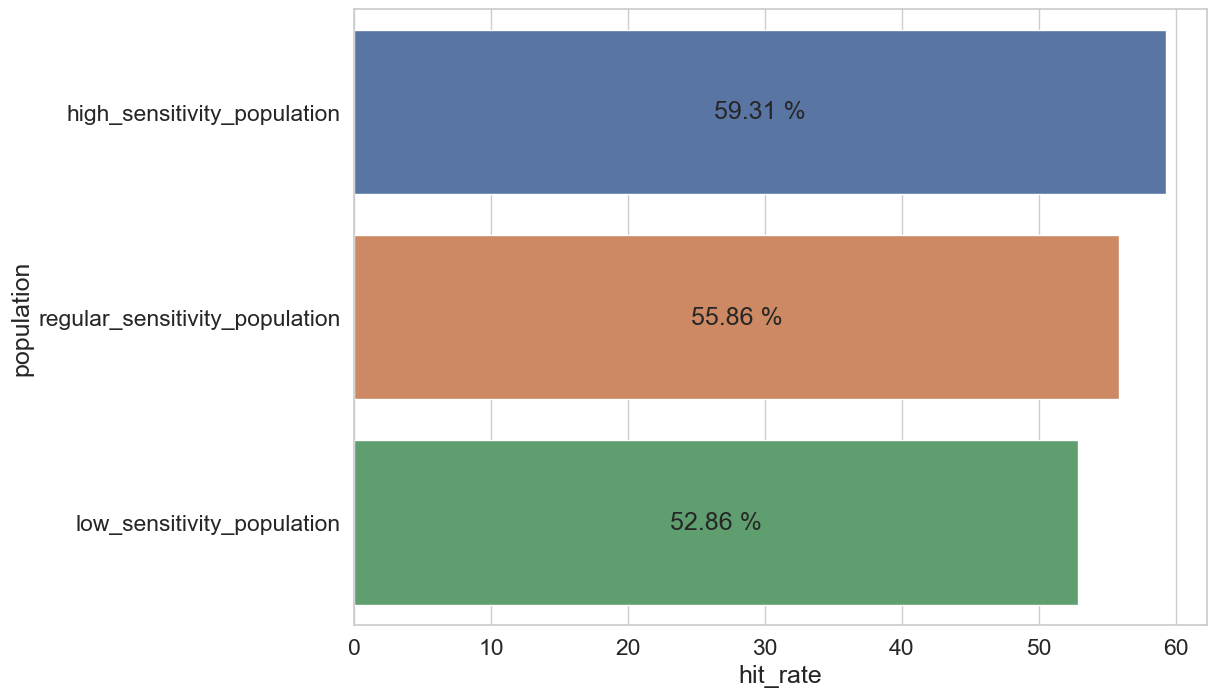

In [18]:
plot_populations_means(music_sensitivity_population_results)